In [1]:
from dataset.dataset import load_affnist_dataset

X, X_test, y, y_test = load_affnist_dataset()

X.shape, y.shape

2023-11-05 18:40:28.389409: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-11-05 18:40:28.460873: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-11-05 18:40:28.462200: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-11-05 18:40:29.742247: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


((8000, 1600), (8000,))

In [1]:
from models.neural_network import ClassificationNeuralNetwork


network = ClassificationNeuralNetwork(
    input_dim=1600,
    hidden_dim=800,
    output_dim=10,
    number_of_hidden_layers=1,
)

print(network)

DenseLayer: input 1600, neurons 800 -> ReLU 
DenseLayer: input 800, neurons 800 -> ReLU 
DenseLayer: input 800, neurons 10 -> SoftMax 



In [2]:
from models.optimizer import Optimizer
from models.metrics import CategoricalCrossEntropyLoss, Accuracy


optimizer = Optimizer(
    network,
    accuracy=Accuracy(),
    loss=CategoricalCrossEntropyLoss(),
    learning_rate=0.85,
    batch_size=128,
    epochs=10,
    reshape=False,
)

optimizer.fit(X, y)

accuracy = optimizer.accuracy
loss = optimizer.loss

Epoch 0  -- accuracy 0.168 - loss 2.244


In [ ]:
import matplotlib.pyplot as plt

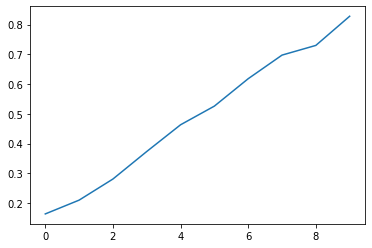

In [ ]:
plt.plot(accuracy)
plt.show()

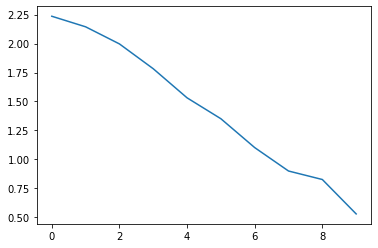

In [ ]:
plt.plot(loss)
plt.show()

In [ ]:
import numpy as np

acc = Accuracy()
loss = CategoricalCrossEntropyLoss()
test_accuracy = np.mean(
    [
        acc.calculate(network.forward(X_val), y_val)
        for X_val, y_val in zip(X_test, y_test)
    ]
)

f"Model accuracy is {test_accuracy}"

'Model accuracy is 0.652'